# 1\. Introdução 

## 1\.1\. Contexto 

A análise realizada explorou os dados da pesquisa do State of Data, que proporcionou informações cruciais para o setor de dados, como a demanda crescente por profissionais, o aumento da diversidade de gênero, a faixa etária predominante e a distribuição geográfica dos profissionais de dados no Brasil. Esses insights são fundamentais para compreender as tendências e desafios enfrentados pelos profissionais e empresas dessa área.

O "State of Data" é um mapeamento abrangente sobre os profissionais da área de dados no Brasil, resultado de uma parceria entre as comunidades Data Hackers e Bain & Company. Em 2022, foi divulgada a segunda edição dessa pesquisa de mercado, conduzida por meio de entrevistas com 4.270 respondentes em todo o território brasileiro.

O objetivo da pesquisa era compreender as principais mudanças ocorridas na área no ano em questão, refletindo a visão diversificada tanto dos colaboradores quanto das empresas do setor, independentemente de seus papéis e níveis de experiência profissional. Os resultados revelaram informações valiosas, tais como:
- Alta demanda por profissionais no mercado;
- Aumento na diversidade de gênero em comparação com o ano anterior, apesar da predominância masculina;
- Faixa etária predominante entre 21 e 40 anos;
- Maior concentração de profissionais nas regiões Sul e Sudeste do país.

Essa pesquisa apresenta inúmeros pontos que, quando analisados de forma mais aprofundada, podem ampliar a visão da comunidade de dados, fornecendo insights significativos tanto para empresas que buscam construir equipes de dados assertivas, quanto para profissionais que desejam ingressar ou progredir na área.

Os dados coletados e analisados oferecem uma base sólida para a compreensão do cenário atual da área de dados no Brasil, bem como orientam estratégias e decisões futuras no campo da análise de dados. A pesquisa do "State of Data" é uma ferramenta valiosa para impulsionar o crescimento e a evolução contínua do ecossistema de dados no país.

Vale ressaltar que a colaboração e engajamento contínuos da comunidade são essenciais para aperfeiçoar ainda mais o entendimento e a aplicação dos insights obtidos a partir dessas pesquisas


### 1\.2\. Objetivo

Construção de uma análise exploratória a partir do conjunto de dados fornecidos pelo State of Data Brazil, afim de processar, explorar e extrair insights de forma estruturada, utilizando-se as ferramentas: Google Colab e a linguagem de programação Python.
Dentro destes dados, analisar a distrubuição das faixas salariais entre os cargos "Analista de dados", "Cientista de dados" e "Engenheiro de dados" comparando os valores entre os níveis de experiência Junior, Pleno e Sênior.

# 2\. Dados

O dataset da pesquisa encontra-se através do link ([link text](https://www.kaggle.com/datasets/datahackers/state-of-data-2022)) disponibilizado no perfil do State of Data Brazil. este arquivo em formato CSV apresenta 10 MB onde é dividido em 8 partes com temas especificos. Cada parte contém perguntas classificadas por letras e opções de escolha classificadas por numero, totalizando 353 colunas e 4271 linhas que representam os respondentes

# 3\. Exploração

A primeira parte da exploração consistiu em abrir o arquivo CSV, ler e processar a linha do cabeçalho, para que fosse possivel localizar colunas cujo nome contenha 'P2'.
Segundo os detalhes do arquivo, esta coluna representa os dados sobre as carreira dos participantes da pesquisa sendo as informações de interesse desta análise.

In [1]:
with open(file="/kaggle/input/state-of-data-2022/State_of_data_2022.csv", mode="r", encoding='utf8') as fp: # Abre o arquivo no modo leitura
  header = fp.readline() # Le a primeira linha do cabeçalho

print(header[0:200]) # Imprime as 200 primeiras linhas

"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', '


In [2]:
header = header.split(sep='","') # Quebra a linha do cabeçalho usando a virgula como delimitador e transforma as informações extraidas em lista

for column, column_name in enumerate(header): # Itera sobre a lista header, onde column é o índice (posição) da coluna e column_name é o nome da coluna.
  if 'P2' in column_name:
    print(str(column) + ' ' + column_name)

16 ('P2_a ', 'Qual sua situação atual de trabalho?')
17 ('P2_b ', 'Setor')
18 ('P2_c ', 'Numero de Funcionarios')
19 ('P2_d ', 'Gestor?')
20 ('P2_e ', 'Cargo como Gestor')
21 ('P2_f ', 'Cargo Atual')
22 ('P2_g ', 'Nivel')
23 ('P2_h ', 'Faixa salarial')
24 ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
25 ('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')
26 ('P2_k ', 'Você está satisfeito na sua empresa atual?')
27 ('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')
28 ('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')
29 ('P2_l_2 ', 'Salário atual não corresponde ao mercado')
30 ('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')
31 ('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')
32 ('P2_l_5 ', 'Gostaria de receber mais benefícios')
33 ('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')
34 ('P2_l_7 ', 'Falta d

# 4\. Processamento

### 4\.1\. Bibliotecas

In [3]:
import pandas as pd
import seaborn as sns

### 4\.2\. Leitura

A leitura do arquivo será feita através da biblioteca Pandas

In [4]:
data = list()

with open(file="/kaggle/input/state-of-data-2022/State_of_data_2022.csv", mode="r", encoding='utf-8') as fp:
  header = fp.readline()
  line = fp.readline() # leitura da primeira linha após o cabeçalho

  while line: #laço de repetição
    line = line.split(sep=',') #linha como lista
    data.append({"Cargo": line [21], "Experiencia": line[22], "Salário": line[23]}) # Indices de interesse serão colocados na lista data
    line = fp.readline() 

data_table = pd.DataFrame(data) # converte a lista data em um DataFrame

data_table.head(n=15)

,Cargo,Experiencia,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,,
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [5]:
data_table.shape # quantidade atual de linhas e colunas na lista data

(4271, 3)

### 4\.3\. Limpeza

**Remoção de valores faltantes:**

Na etapa de limpeza, essas linhas de código são usadas para limpar o DataFrame data_table substituindo valores vazios por NA e posteriormente removendo linhas com valores ausentes. 
Aqui, a função replace é usada para substituir todas as strings vazias ('') no DataFrame data_table por pd.NA, que é uma forma padronizada de representar valores ausentes em pandas.

Após, inspeciono as primeiras 15 linhas do DataFrame resultante e obtendo as novas dimensões do DataFrame.
Agora, o arquivo sem informações vazias contém 2790 linhas enquanto o arquivo orginal continha 4271

In [6]:
data_table = data_table.replace('', pd.NA)
data_table = data_table.dropna()
data_table.head(n=15)
data_table.shape

(2790, 3)

**Remoção de linhas corrompidas:**

Essas linhas de código são usadas para limpar a coluna 'Salário' do DataFrame data_table substituindo valores que não contêm 'R$' por NA, removendo as linhas resultantes que contem valores ausentes.

É aplicado uma função lambda a cada valor da coluna 'Salário' do DataFrame data_table verificando se o símbolo "RS",  utilizado para representar a moeda brasileira , esta presente em cada valor da coluna. 
Se 'RS' estiver presente no valor (row), o valor e mantido, se nao estiver presente, o valor e substituido por pd.NA, indicando um valor ausente.
O resultado é uma coluna 'Salário' onde apenas os valores que contêm 'R$' sao mantidos; os outros sao substituidos por valores ausentes (NA) e posteriormente removidos resultando em um dataFrame com 2386 linhas

In [7]:
data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)
data_table = data_table.dropna()
data_table.head(n=15)
data_table.shape

(2386, 3)

**Seleção dos cargos de interesse:**


Essas linhas de código são usadas para filtrar o DataFrame data_table, mantendo apenas as linhas onde a coluna 'Cargo' contém valores que estão na lista de cargos válidos (`position`). Valores que não correspondem aos cargos válidos são substituídos por `NA`, e essas linhas são subsequentemente removidas. 

In [8]:
position = ['Cientista de Dados/Data Scientist', 'Analista de Dados/Data Analyst', 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in position else pd.NA)
data_table = data_table.dropna()
data_table.head(n=15)

,Cargo,Experiencia,Salário
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista de Dados/Data Scientist,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista de Dados/Data Scientist,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [9]:
data_table.shape

(1336, 3)

**Limpeza do nome dos cargos:**

A limpeza dos títulos foi realizada afim de simplificar o texto.

In [10]:
labels = ['Cientista', 'Analista', 'Engenheira']
labels = dict(zip(position, labels))
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: labels[row])
data_table.head(n=15)

,Cargo,Experiencia,Salário
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheira,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheira,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheira,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheira,Sênior,de R$ 8.001/mês a R$ 12.000/mês


A limpeza destes dados resultou em um DataFrame contendo 1336 linhas.
Os dados limpos representam aproximadamente 31% da informações contidas no arquivo original.

A importância de manipular e limpar os dados durante uma análise exploratória de dados (EDA, do inglês Exploratory Data Analysis) é crucial para garantir a precisão, validade e relevância das conclusões.
Dados brutos frequentemente contêm erros, inconsistências, valores ausentes e duplicações. Limpar esses dados é essencial para:
*  Eliminar Erros: Corrigir ou remover dados incorretos, como entradas incorretas ou valores impossíveis.
*  Consistência: Padronizar os formatos dos dados, como datas e unidades de medida.
*  Remover Duplicatas: Identificar e remover registros duplicados que podem distorcer os resultados da análise.

Valores ausentes podem levar a conclusões incorretas ou enviesadas. A limpeza de dados permite:

*  Substituir ou Imputar: Preencher valores ausentes com médias, medianas ou outras técnicas de imputação.
*  Excluir Linhas ou Colunas: Remover registros ou variáveis inteiras se houver muitos valores ausentes.

Dados limpos e organizados facilitam a visualização e a análise, permitindo:

*   Visualizações Claras: Criar gráficos e tabelas mais precisos e fáceis de interpretar.
*   Insights Significativos: Extrair informações úteis e relevantes que podem informar decisões de negócio.

A limpeza de dados é uma etapa essencial da análise exploratória de dados, pois garante que os dados sejam precisos, completos e consistentes, o que é fundamental para obter resultados confiáveis e insights significativos. Ignorar essa etapa pode levar a conclusões errôneas e decisões baseadas em informações incorretas.

**E por fim o salvamento dos dados a partir do código:**

In [11]:
data_table.to_csv("data.csv", header=True, index=False)

# 5\. Insights

### 5\.1\. Análise de quantidade de pessoas por salário, cargo e nível de experiência

**Agrupamento e Agregações**

Uma coluna é criada no DataFrame data_table e intitulada como "Quantidade", onde cada entrada dessa coluna é definida como 1.
Isso é útil para contagem de registros ao agrupar os dados, facilitando o trabalho com as informações por cargo, experiência e salário.


> data_table[['Cargo', 'Experiencia', 'Salário', 'Quantidade']]: Seleciona as colunas relevantes para a agregação.<br>
> groupby(['Cargo', 'Experiencia', 'Salário']): Agrupa os dados pelas colunas 'Cargo', 'Experiencia' e 'Salário'.<br>
> .agg('sum'): Agrega os dados somando a coluna 'Quantidade' para cada grupo.<br>
> reset_index(): Reseta os índices do DataFrame para que a coluna de índice padrão seja usada.<br>


In [12]:
data_table['Quantidade'] = 1
salario_cargo_experiencia_agg = data_table[['Cargo', 'Experiencia', 'Salário', 'Quantidade']].groupby(['Cargo', 'Experiencia', 'Salário']).agg('sum').reset_index()
salario_cargo_experiencia_agg.head(100)

data_table.head(15)

,Cargo,Experiencia,Salário,Quantidade
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
18,Engenheira,Pleno,de R$ 6.001/mês a R$ 8.000/mês,1
23,Engenheira,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,1
31,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
37,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
41,Engenheira,Júnior,de R$ 4.001/mês a R$ 6.000/mês,1
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês,1
49,Engenheira,Sênior,de R$ 8.001/mês a R$ 12.000/mês,1


In [13]:
salario_agg = data_table[['Salário', 'Quantidade']].groupby('Salário').agg('sum').reset_index()


# coluna de suporte: Um dicionário que mapeia as faixas salariais para valores inteiros, facilitando a ordenação das faixas salariais de forma lógica.

salario_ordem = {'Menos de R$ 1.000/mês': 0,
                 'de R$ 1.001/mês a R$ 2.000/mês': 1,
                 'de R$ 2.001/mês a R$ 3.000/mês': 2,
                 'de R$ 3.001/mês a R$ 4.000/mês': 3,
                 'de R$ 4.001/mês a R$ 6.000/mês': 4,
                 'de R$ 6.001/mês a R$ 8.000/mês': 5,
                 'de R$ 8.001/mês a R$ 12.000/mês': 6,
                 'de R$ 12.001/mês a R$ 16.000/mês': 7,
                 'de R$ 16.001/mês a R$ 20.000/mês': 8,
                 'de R$ 20.001/mês a R$ 25.000/mês': 9,
                 'de R$ 25.001/mês a R$ 30.000/mês': 10,
                 'de R$ 30.001/mês a R$ 40.000/mês': 11,
                 'Acima de R$ 40.001/mês': 12
}


salario_cargo_experiencia_agg['Ordem'] = salario_cargo_experiencia_agg['Salário'].apply(lambda row: salario_ordem[row]) # Criação de nova coluna intitulada 'ordem'
salario_cargo_experiencia_agg = salario_cargo_experiencia_agg.sort_values(by=['Cargo', 'Experiencia', 'Ordem'], ascending=[True, True, True])

salario_cargo_experiencia_agg.head(100) # Visualização

,Cargo,Experiencia,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
...,...,...,...,...,...
73,Engenheira,Sênior,de R$ 16.001/mês a R$ 20.000/mês,14,8
74,Engenheira,Sênior,de R$ 20.001/mês a R$ 25.000/mês,10,9
75,Engenheira,Sênior,de R$ 25.001/mês a R$ 30.000/mês,6,10
77,Engenheira,Sênior,de R$ 30.001/mês a R$ 40.000/mês,3,11


<h2> Visualizações gráficas</h2>

A biblioteca Seaborn foi utilizada para permitir a visualização gráfica dos resultados.
O **gráfico de barras** foi escolhido pois representa a relação entre uma variável categórica com uma variável numérica

Por fim, os cargos são filtrados por nível de experiência

**Analista**

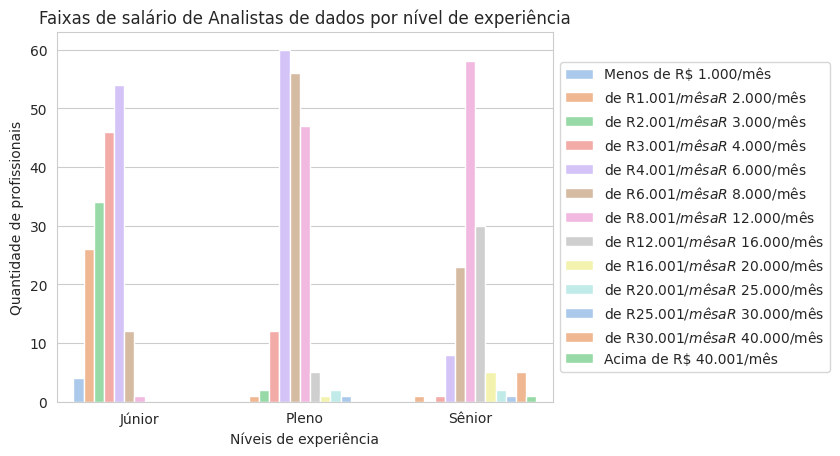

In [14]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Analista'] #filtragem do cargo analista

with sns.axes_style('whitegrid'):

  plot = sns.barplot(data=data, x='Experiencia', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário de Analistas de dados por nível de experiência')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Níveis de experiência')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Cientista**

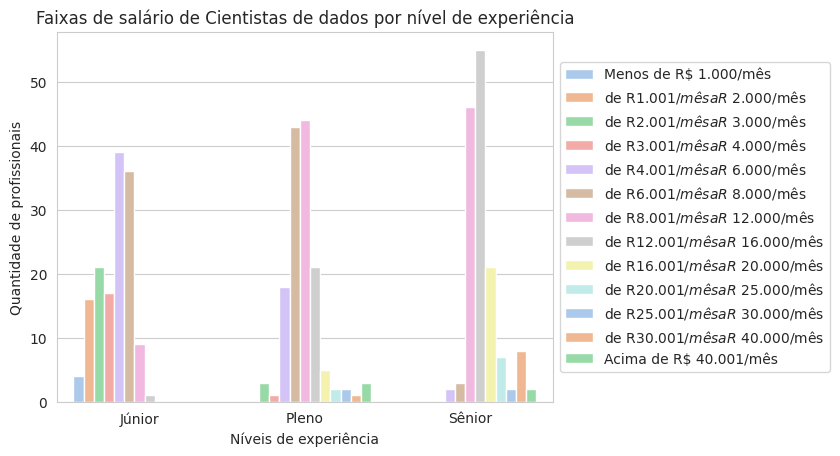

In [15]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Cientista']

with sns.axes_style('whitegrid'):

  plot = sns.barplot(data=data, x='Experiencia', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário de Cientistas de dados por nível de experiência')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Níveis de experiência')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Engenheiro**

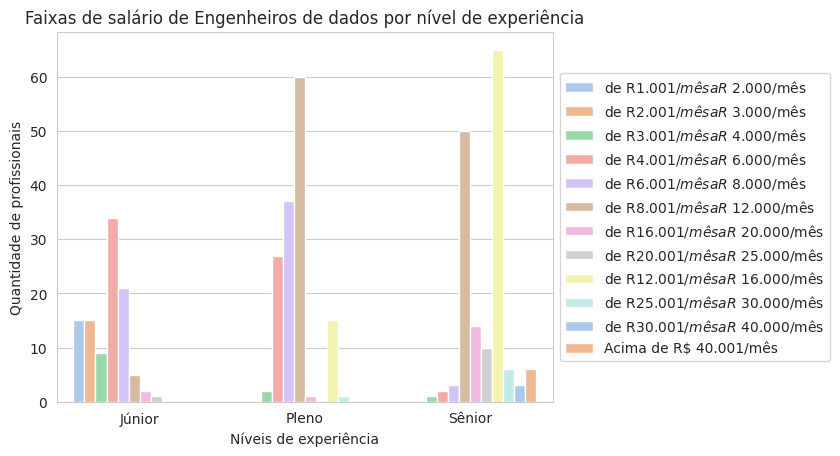

In [16]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Engenheira']

with sns.axes_style('whitegrid'):

  plot = sns.barplot(data=data, x='Experiencia', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário de Engenheiros de dados por nível de experiência')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Níveis de experiência')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<h2> Resultados </h2>

A análise da distribuição dos salários nos cargos de Analista, Engenheiro e Cientista de Dados revela algumas tendências importantes. 

Primeiramente, observamos que os cargos de Cientista e Engenheiro apresentam uma média salarial maior em comparação ao cargo de Analista, que possui remunerações mais baixas. No entanto, a demanda por Analistas de Dados no mercado é significativamente maior do que para os outros cargos.

**Analistas de Dados** <br>
Nível Júnior: A maioria dos salários está na faixa de RS 2.000,00 a RS 6.000,00 por mes. Ha pouca representacao de salarios mais altos, indicando que o teto salarial para juniores é relativamente baixo.
Nivel Pleno: A faixa salarial mais comum vai de RS 4.000,00 a RS 12.000,00 por mes. Ha uma maior dispersao de salarios, mas ainda limitada em comparacao aos niveis mais altos.
Nivel Senior: O destaque é para a faixa salarial de RS 8.000,00 a RS 12.000,00 por mes, que representa a maioria dos salarios. Este valor é o maximo para juniores e um indicativo de estabilidade salarial em niveis superiores de experiência.


**Cientistas de Dados** <br>
Níveis Juniores e Plenos: Apresentam faixas salariais maiores comparadas aos Analistas, com uma concentração significativa entre RS 4.000,00 e RS 12.000,00 por mês.
Nível Sênior: Destaca-se pela faixa de RS 16.000,00 a RS 20.000,00 por mês, com outliers em valores acima de RS 20.000,00. 
Isso mostra um incremento salarial substancial para profissionais com mais experiencia.


**Engenheiros de Dados** <br>
Níveis Juniores: Salários semelhantes aos dos Cientistas, entre RS 4.000,00 e RS 12.000,00 por mes.
Nivel Pleno e Senior: Apresentam picos salariais mais altos e uma distribuicao de salarios mais ampla. O aumento na experiência se reflete em um incremento significativo nos salários, com valores chegando até acima de RS 40.000,00 por mes para niveis seniores.


**Tendências Gerais** <br>
Faixa Salarial de Destaque: A faixa de RS 8.000,00 a RS 12.000,00 por mês é significativa para todos os cargos, indicando uma valorização do mercado de dados em comparação à média salarial da população brasileira.
Impacto da Experiência: Há uma clara correlação entre o nível de experiência e a faixa salarial, especialmente visível nos cargos de Cientista e Engenheiro de Dados. Profissionais mais experientes tendem a atingir faixas salariais superiores.
Demanda de Mercado: A maior demanda por Analistas de Dados sugere uma necessidade crescente de profissionais capazes de interpretar e analisar dados, apesar dos salários mais baixos comparados a Engenheiros e Cientistas.
